In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/DATASET

/content/gdrive/My Drive/DATASET


In [4]:
!ls

best_model.h5  data_klasifikasi_batik


In [5]:
#eksplor data
import os
for dirpath, dirnames, filenames in os.walk("data_klasifikasi_batik"):
  print(f"Ada{len(dirnames)}direktori dan {len(filenames)}gambar di dalam {dirpath}")

Ada2direktori dan 0gambar di dalam data_klasifikasi_batik
Ada15direktori dan 0gambar di dalam data_klasifikasi_batik/TEST
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Tambal
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Poleng
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Parang
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Sekar Jagad
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Pala
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Dayak
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Betawi
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Geblek Renteng
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Kawung
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Insang
Ada0direktori dan 20gambar di dalam data_klasifikasi_batik/TEST/Batik Cendrawasih
Ada0direktori da

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder),1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Ukuran Gambar:{img.shape}")
  return img


Ukuran Gambar:(224, 224, 3)


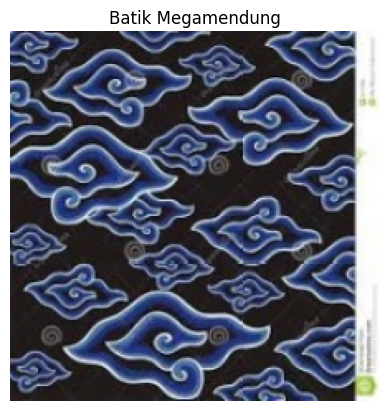

In [14]:
img = view_random_image("data_klasifikasi_batik/TRAIN/", "Batik Megamendung")

In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt

In [9]:
tf.random.set_seed(46)

In [15]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.7, 1.0],
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_dir = "data_klasifikasi_batik/TRAIN/"
test_dir = "data_klasifikasi_batik/TEST/"

In [17]:
train_data_augmented = train_datagen.flow_from_directory(
    train_dir,
    batch_size=16,
    target_size=(224, 224),
    class_mode="categorical",
    shuffle=True
)

valid_data = valid_datagen.flow_from_directory(
    test_dir,
    batch_size=16,
    target_size=(224, 224),
    class_mode="categorical",
    shuffle=False
)


Found 1050 images belonging to 15 classes.
Found 300 images belonging to 15 classes.


In [18]:
# Build the model using a pre-trained MobileNetV2
base_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

# Unfreeze more layers in the base model
base_model.trainable = True
for layer in base_model.layers[:-100]:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.4),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(15, activation='softmax')
])

9406464/9406464 [==============================] - 0s 0us/step


In [19]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [20]:
#Callbacks
checkpoint = ModelCheckpoint(
    "best_model.h5",
    monitor='val_loss',
    save_best_only=True,
    mode='min'
)
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,  # Menambahkan lebih banyak kesabaran
    restore_best_weights=True
)
lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    verbose=1
)

In [21]:
# Train the model
history = model.fit(
    train_data_augmented,
    epochs=50,  # Menambah jumlah epoch
    validation_data=valid_data,
    callbacks=[checkpoint, early_stopping, lr_scheduler],
    verbose=1
)

Epoch 1/50
66/66 [==============================] - ETA: 0s - loss: 3.0809 - accuracy: 0.1381

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


66/66 [==============================] - 400s 6s/step - loss: 3.0809 - accuracy: 0.1381 - val_loss: 2.4943 - val_accuracy: 0.2067 - lr: 1.0000e-04
Epoch 2/50
66/66 [==============================] - 137s 2s/step - loss: 2.3209 - accuracy: 0.2581 - val_loss: 2.4377 - val_accuracy: 0.3033 - lr: 1.0000e-04
Epoch 3/50
66/66 [==============================] - 136s 2s/step - loss: 2.0911 - accuracy: 0.3305 - val_loss: 2.3524 - val_accuracy: 0.3867 - lr: 1.0000e-04
Epoch 4/50
66/66 [==============================] - 134s 2s/step - loss: 1.8690 - accuracy: 0.3914 - val_loss: 2.4290 - val_accuracy: 0.4000 - lr: 1.0000e-04
Epoch 5/50
66/66 [==============================] - 136s 2s/step - loss: 1.6736 - accuracy: 0.4762 - val_loss: 2.2214 - val_accuracy: 0.4833 - lr: 1.0000e-04
Epoch 6/50
66/66 [==============================] - 152s 2s/step - loss: 1.5249 - accuracy: 0.5257 - val_loss: 2.1927 - val_accuracy: 0.4700 - lr: 1.0000e-04
Epoch 7/50
66/66 [==============================] - 146s 2s/ste

In [23]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  #plot
  plt.plot(epochs, loss, label ='training_loss')
  plt.plot(epochs, val_loss, label ='val_loss')
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label ='training_acc')
  plt.plot(epochs, val_accuracy, label ='val_acc')
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

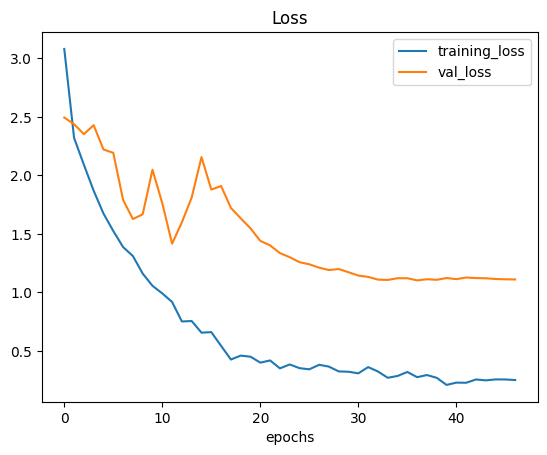

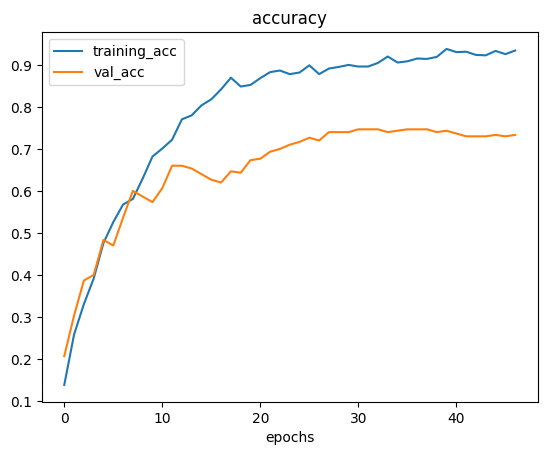

In [24]:
plot_loss_curves(history)